# EDA PRECIO DE AL VIVIENDA

## IMPORTO LAS LIBRERIAS Y EL DATASET

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#CREO 2 DATAFRAMES PARA LUEGO PODER COMPARAR SI HAGO ALGUN CAMBIO
data = pd.read_csv('../data/Housing.csv')
df = data

## INFORMACION DEL DATASET (ESTADISTICOS, FORMA, NULOS, TIPOS DE DATOS)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [127]:
df.shape

(545, 13)

In [128]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [129]:
df.describe().round(2)

,price,area,bedrooms,bathrooms,stories,parking
count,545.00,545.00,545.00,545.00,545.00,545.00
mean,4766729.25,5150.54,2.97,1.29,1.81,0.69
std,1870439.62,2170.14,0.74,0.50,0.87,0.86
min,1750000.00,1650.00,1.00,1.00,1.00,0.00
25%,3430000.00,3600.00,2.00,1.00,1.00,0.00
50%,4340000.00,4600.00,3.00,1.00,2.00,0.00
75%,5740000.00,6360.00,3.00,2.00,2.00,1.00
max,13300000.00,16200.00,6.00,4.00,4.00,3.00


In [130]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## TRANSFORMACIÓN DE DATOS

In [131]:
# CONVIERTO LAS VARIABLES CATEGORICAS A NUMERICAS PARA PODER HACER LA MATRIZ CORRELACION CON MAS VARIABLES Y VER LA RELACION ENTRE EL PRECIO Y TODAS LAS COLUMNAS
# CREO UN NUEVO DATAFRAME (numeric_df) PARA NO AFECTAR EL RESTO DEL ANALISIS Y PODER UTILIZARLA SOLO PARA ESTE GRAFICO

numeric_df = data.copy()
columns_to_convert = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']  # Reemplaza con las columnas que quieras convertir
numeric_df[columns_to_convert] = numeric_df[columns_to_convert].applymap(lambda x: 1 if x == 'yes' else 0)
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 1, 'semi-furnished': 2, 'unfurnished': 3})

/var/folders/1c/jqkrnjc17wg549czb9tt7mkc0000gn/T/ipykernel_28003/339550329.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_df[columns_to_convert] = numeric_df[columns_to_convert].applymap(lambda x: 1 if x == 'yes' else 0)


## FUNCIONES DE LOS GRÁFICOS

In [132]:
# GRAFICOS DE CANTIDAD DE VALORES UNICOS POR COLUMNA

def valores_unicos_columna (df):
    for column in df.columns:
        if column != 'area' and column != 'price':
            value_counts = df[column].value_counts().sort_index()
            
            plt.figure(figsize=(6, 4))
            ax = value_counts.plot(kind='bar', color='skyblue')
            
            for i, v in enumerate(value_counts):
                ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')
            
            plt.title(f'Cantidad de valores únicos en {column}')
            plt.xlabel(column)
            plt.ylabel('Cantidad')
            
            plt.tight_layout()
            plt.show()

In [133]:
# MATRIZ DE CORRELACION PARA VER LA RELACION ENTRE TODAS LAS VARIABLES

def matriz_correlacion(df):
    corr_matrix = df.select_dtypes(include=['number']).corr()

    plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

    plt.title("Matriz de Correlación")
    plt.show()

In [134]:
# GRAFICO DE DISPERSIÓN PARA VER LA RELACIÓN ENTRE EL PRECIO Y EL AREA

def dispersion_precio_area (df):
    plt.figure(figsize=(10, 6))
        
    # Graficar dispersión con línea de regresión
    sns.regplot(x=df['area'], y=df['price'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

    # Calcular pendiente (m) con np.polyfit
    pendiente, intercept = np.polyfit(df['area'], df['price'], 1)

    plt.title(f'Gráfico de dispersión entre precio y area \nPendiente: {pendiente:.4f}')
    plt.xlabel('Area')
    plt.ylabel('Precio')

    plt.show()

    # Calcular y mostrar correlación
    correlation = df['price'].corr(df['area'])
    print(f'La correlacion entre el precio y el area es: {correlation:.4f}')
    print(f'La pendiente entre el precio y el area es: {pendiente:.4f}\n')

In [135]:
# HISTOGRAMA DE LA DISTRIBUCION DEL PRECIO DE LA VIVIENDA

def histograma_dist_precio(df):
    plt.figure(figsize=(10, 5))
    sns.histplot(df["price"], bins=30, kde=True, color="blue")
    plt.title("Distribucion del precio de la vivienda")
    plt.xlabel("Precio")
    plt.ylabel("Frecuencia")
    plt.show()

In [136]:
# GRAFICOS DE BARRAS PARA VER LA MEDIA DEL PRECIO POR CADA VALOR UNICO DE CADA COLUMNA

def media_precio_columnas (df):
    for col in df.columns:
        if col not in ["price", "area"]:  
            mean_price = df.groupby(col)["price"].mean()  
            
            plt.figure(figsize=(10, 5))
            bars = mean_price.plot(kind='bar', color='skyblue')
            
            plt.title(f"Media del Precio por {col}")
            plt.xlabel(col)
            plt.ylabel("Media de Precio")
            plt.xticks(rotation=45)

            for i, value in enumerate(mean_price):
                plt.text(i, value, f"{value:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

            plt.show()

In [137]:
# GRAFICOS DE BARRAS PARA VER LA MEDIANA DEL PRECIO POR CADA VALOR UNICO DE CADA COLUMNA

def mediana_precio_columnas (df):
    for col in df.columns:
        if col not in ["price", "area"]: 
            median_price = df.groupby(col)["price"].median()  
            
            plt.figure(figsize=(10, 5))
            bars = median_price.plot(kind='bar', color='lightcoral')  
            
            plt.title(f"Mediana del Precio por {col}")
            plt.xlabel(col)
            plt.ylabel("Mediana de Price")
            plt.xticks(rotation=45)

            for i, value in enumerate(median_price):
                plt.text(i, value, f"{value:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

            plt.show()

## GRAFICOS Y CONCLUSIONES

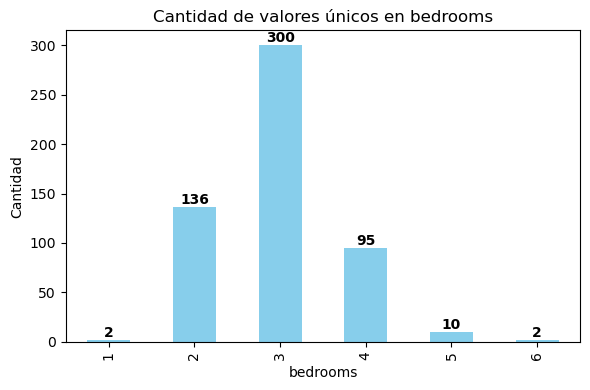

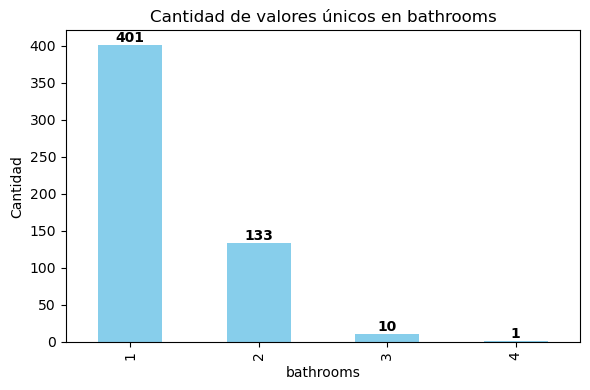

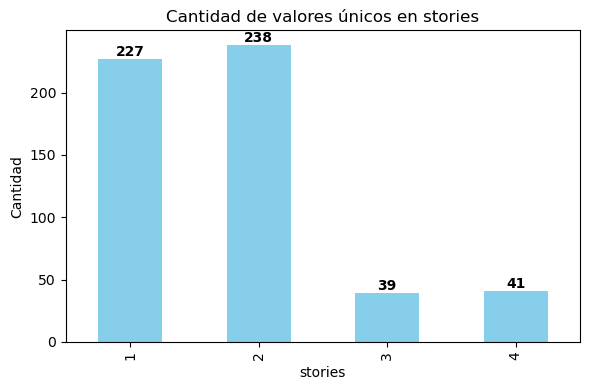

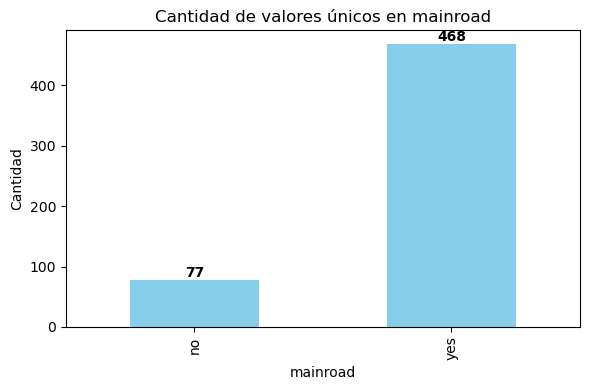

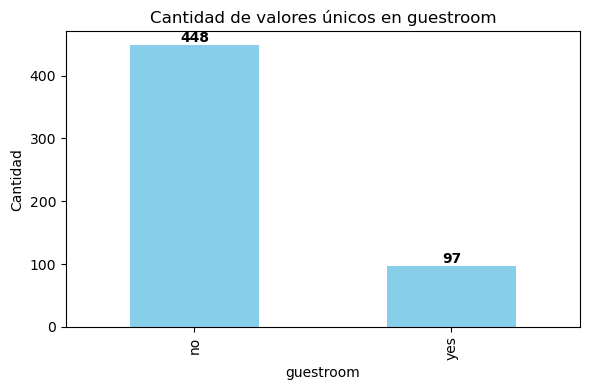

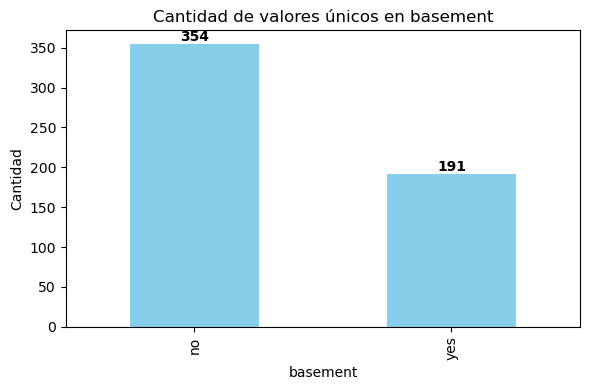

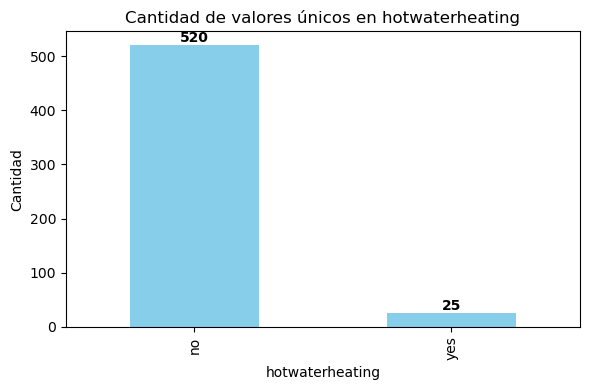

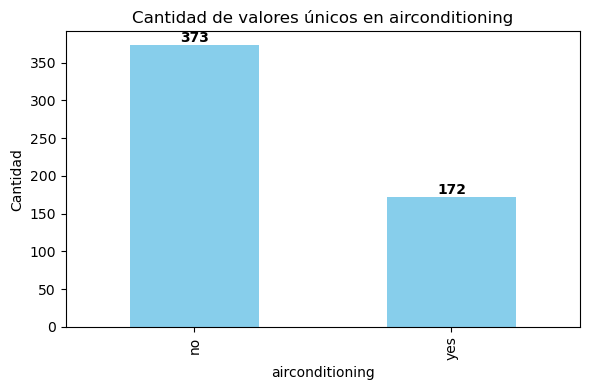

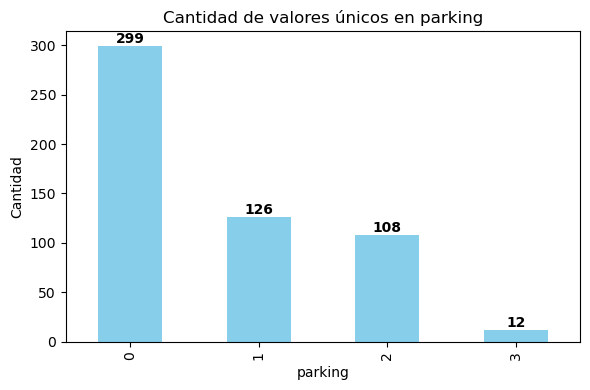

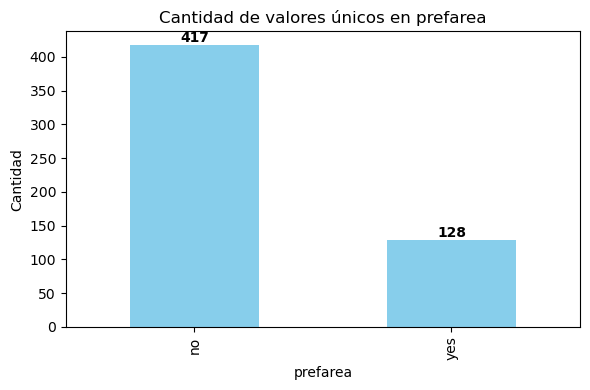

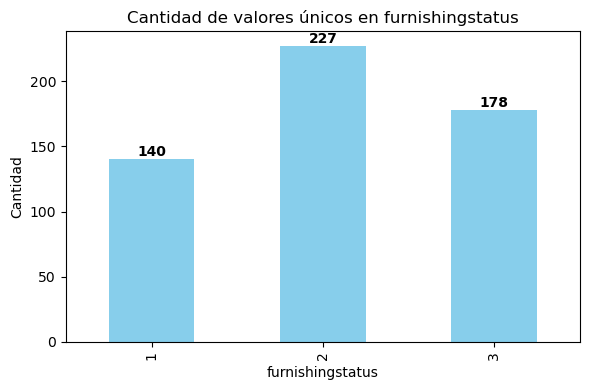

In [138]:
valores_unicos_columna(df)

De estos gráficos podemos concluir que algunas columnas tienen muy pocos registros de algún valor en concreto, lo que puede confundirnos a la hora de ver la relacion de estas columnas con el precio. Estas columnas que tienen muy pocos registros son:
- bedrooms:
    - 1 habitación: 2 valores
    - 6 habitaciones: 2 valores
    - 5 habitaciones: 10 registros
- bathrooms:
    - 4 baños: 1 registro 
    - 3 baños: 10 registros

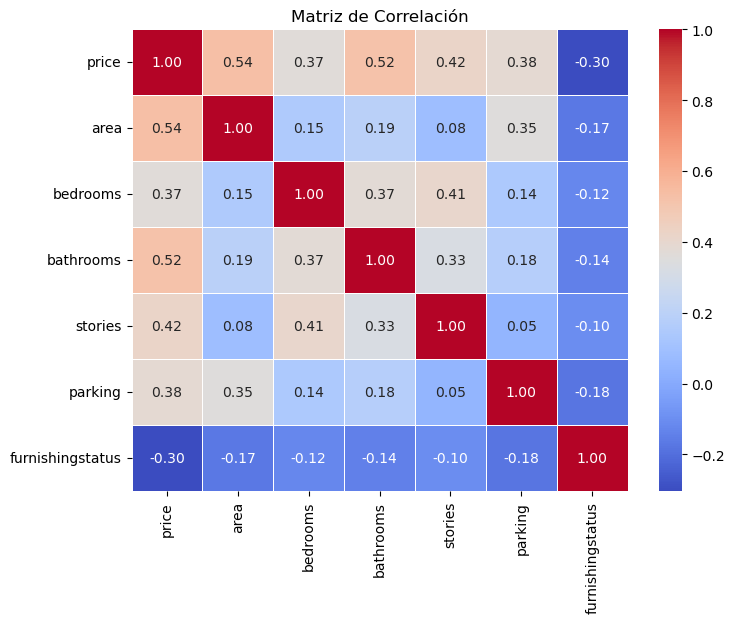

In [139]:
matriz_correlacion(df)

Podemos ver que el area es la variable que mas influye en el Precio. Seguido de El numero de baños y el numero de pisos. 

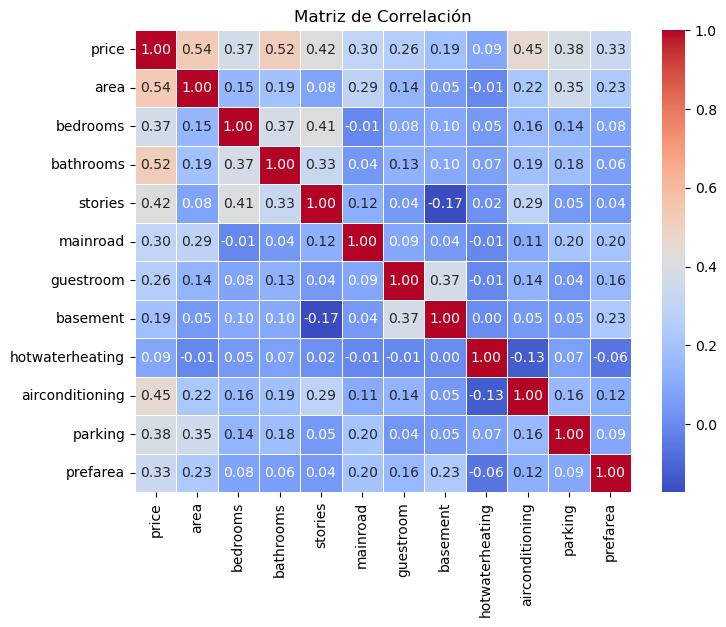

In [140]:
matriz_correlacion(numeric_df)

En la nueva matriz de correlación con más datos categóricos convertidos a numéricos podemos observar que se añaden nuevas variables que influyen en el precio con una correlacion positiva que son si tiene on no aire acondicionado y si tiene o no parking. 

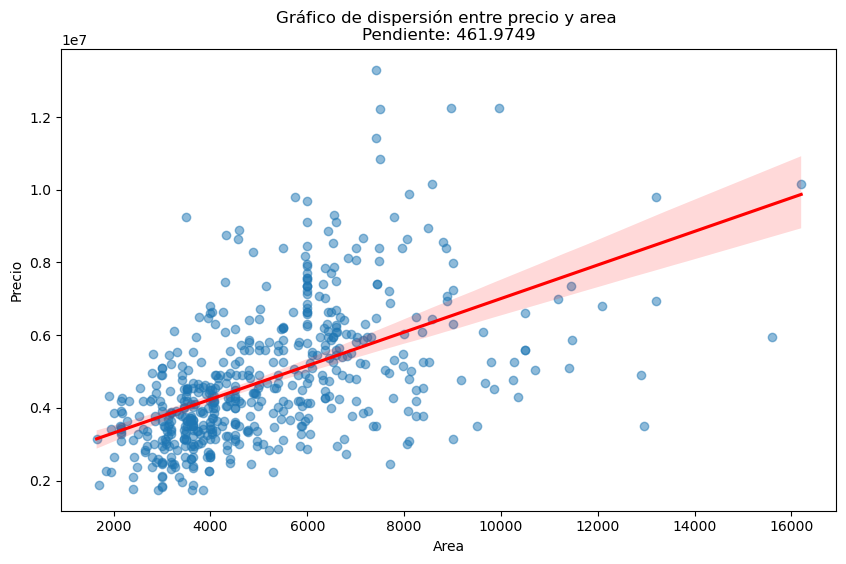

La correlacion entre el precio y el area es: 0.5360
La pendiente entre el precio y el area es: 461.9749



In [141]:
dispersion_precio_area(df)

Podemos observar que la correlacion entre el area y el precio es de 0.536 y cuanto mas aumenta el area, más aumenta el precio. Hay varios valores outliers que podriamos eliminar para tener una mayor correlacion y hacer una prediccion más precisa para la mayoría de viviendas. 

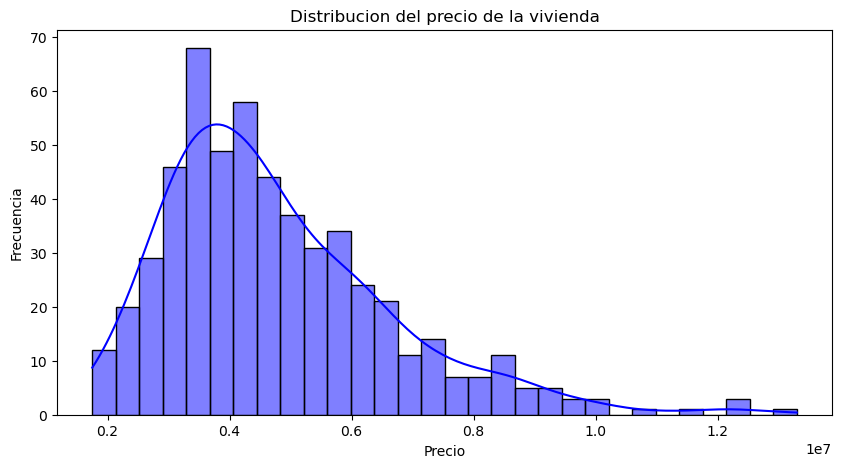

In [142]:
histograma_dist_precio(df)

Podemos observar que tenemos una distribución asimétrica positiva y que la mayoria de las viviendas cuestan entre 300 000 y 600 000 euros.

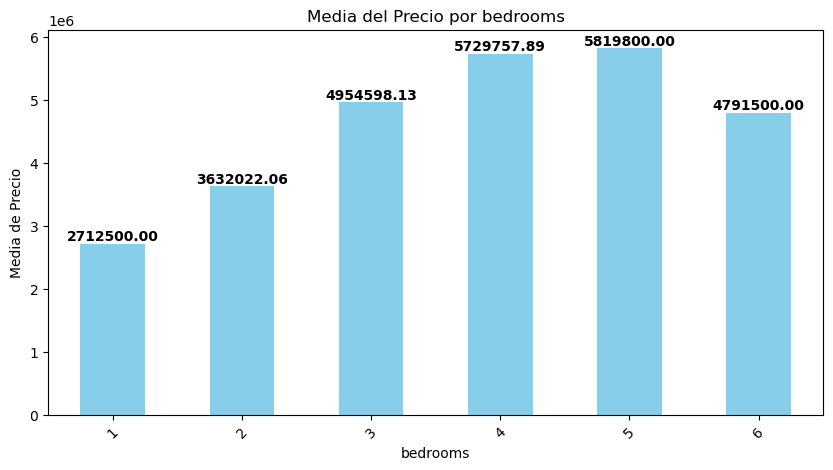

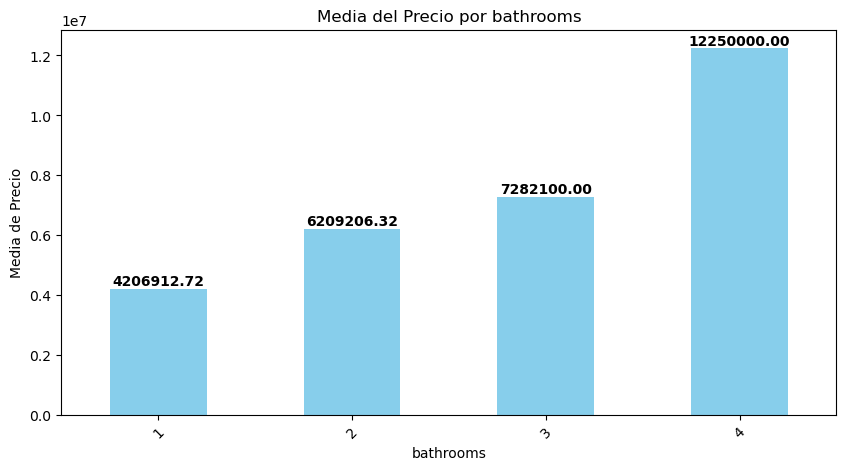

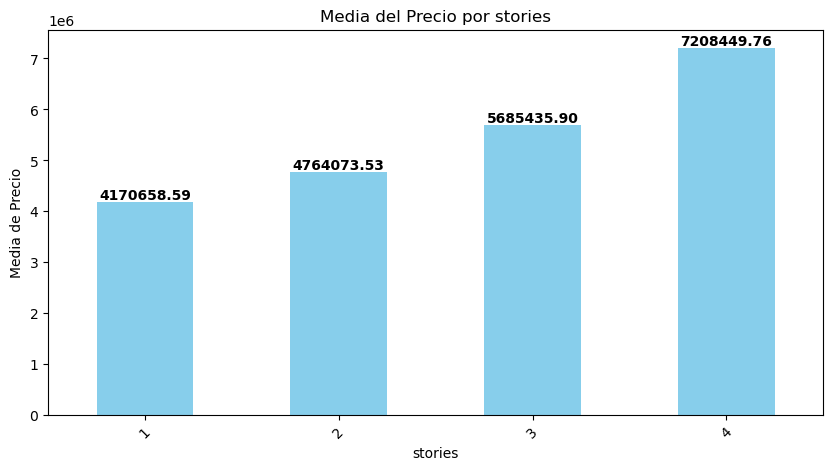

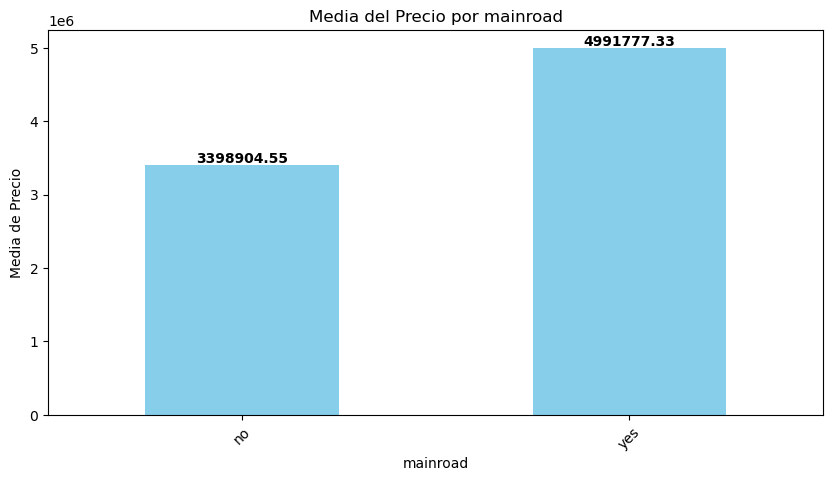

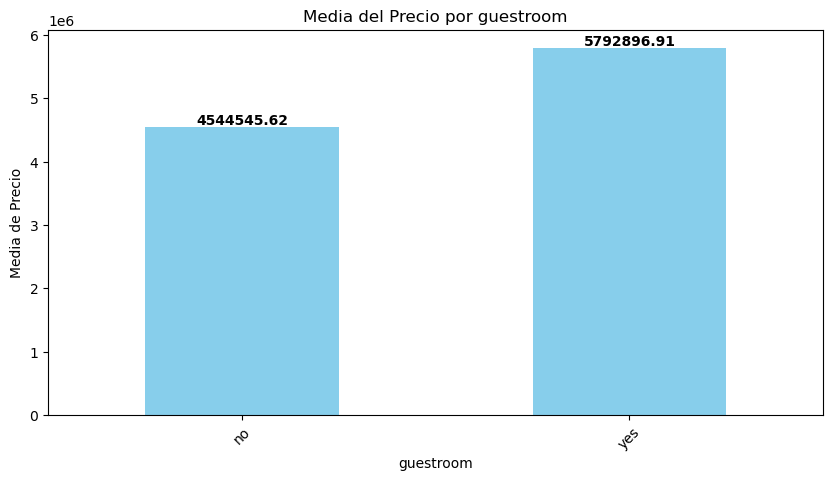

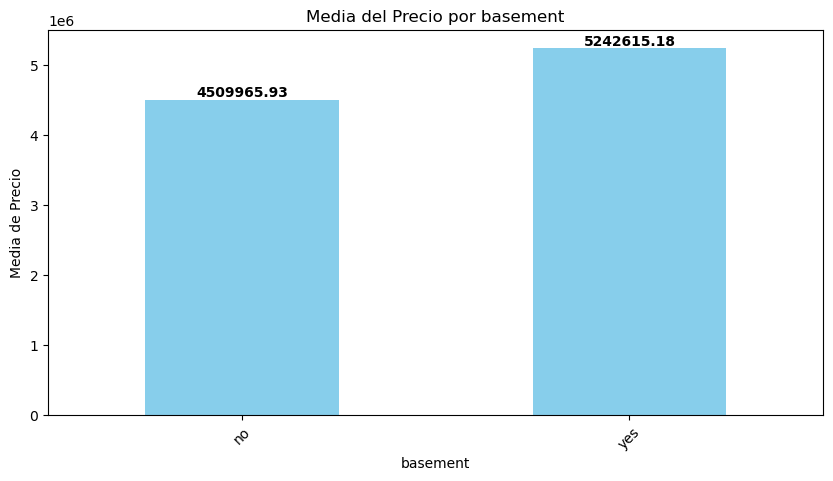

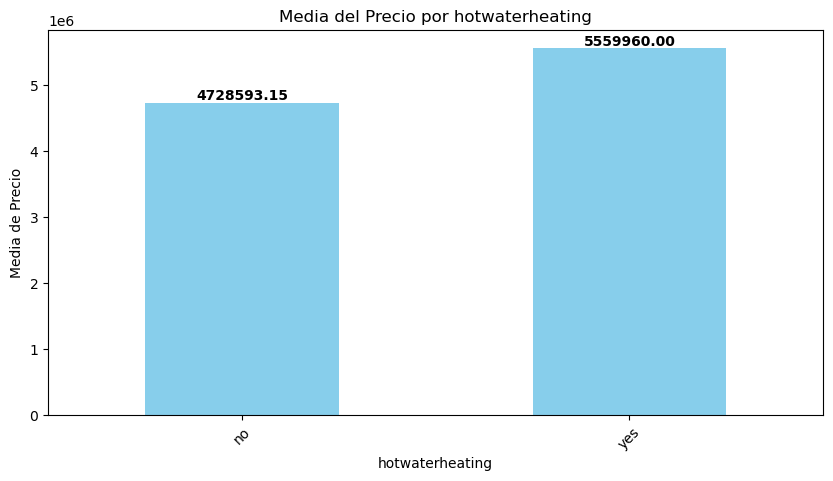

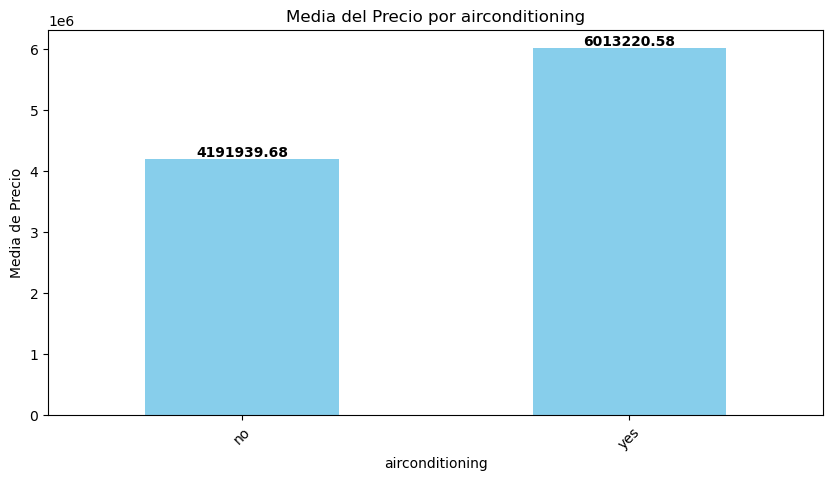

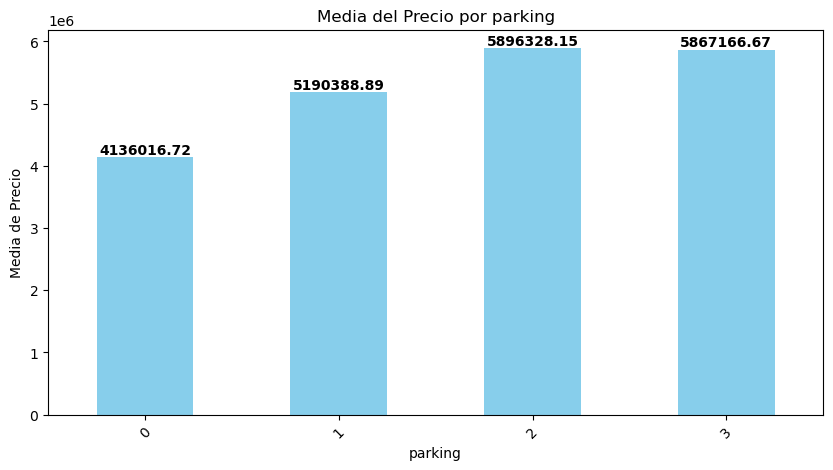

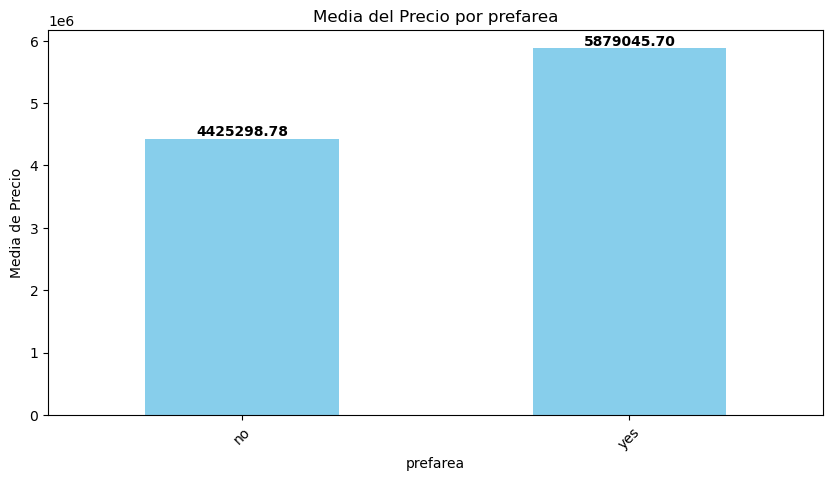

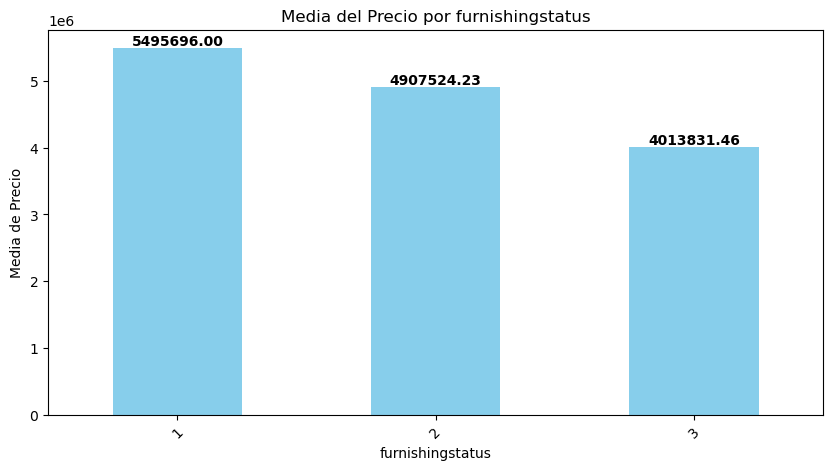

In [143]:
media_precio_columnas(df)

Podemos observar que en las viviendas mas caras (de medida) son las que tienen las siguientes caracteristicas:
- 5 habitaciones
- 4 baños
- 4 pisos
- Vivienda en una calle principal 
- Tiene un cuarto de invitados
- Tiene sotano
- Tiene calentador de agua
- Tiene aire acondicionado
- Tiene 2 plazas de parking 
- La vivienda esta en el area preferida 
- Esta amueblado

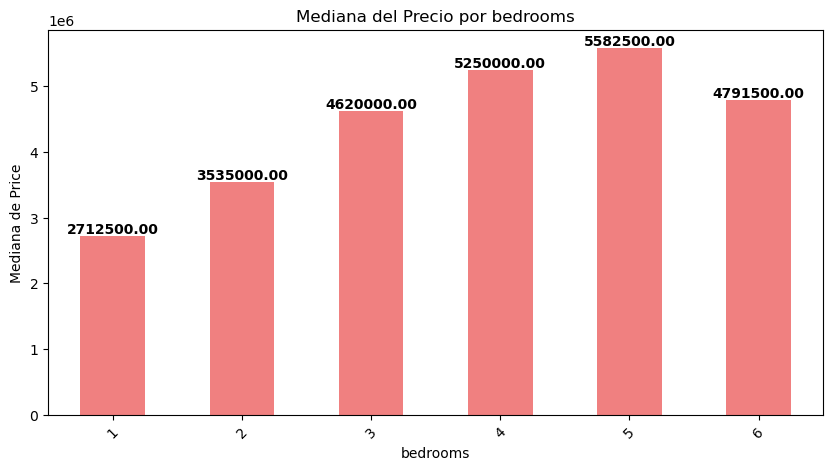

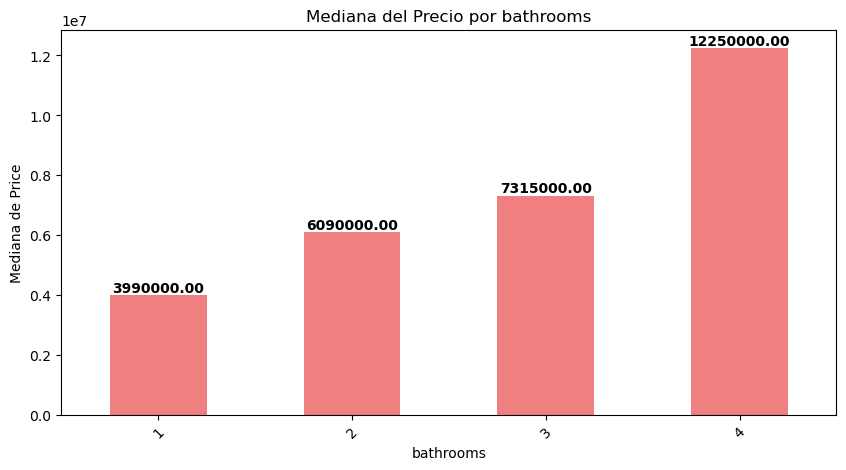

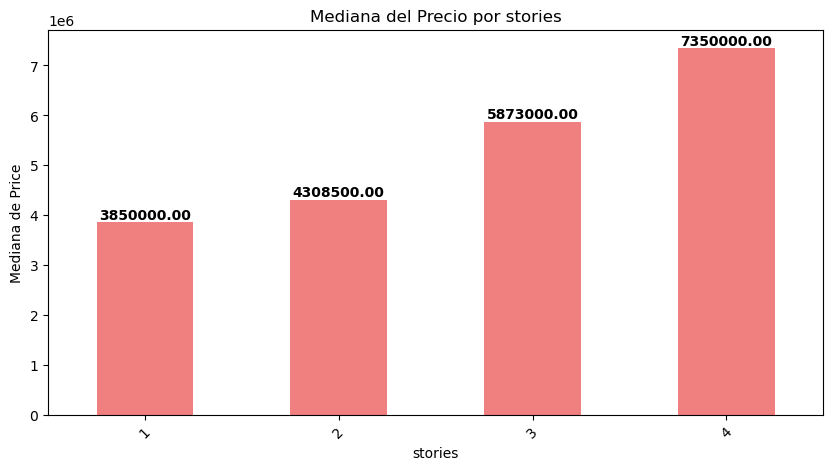

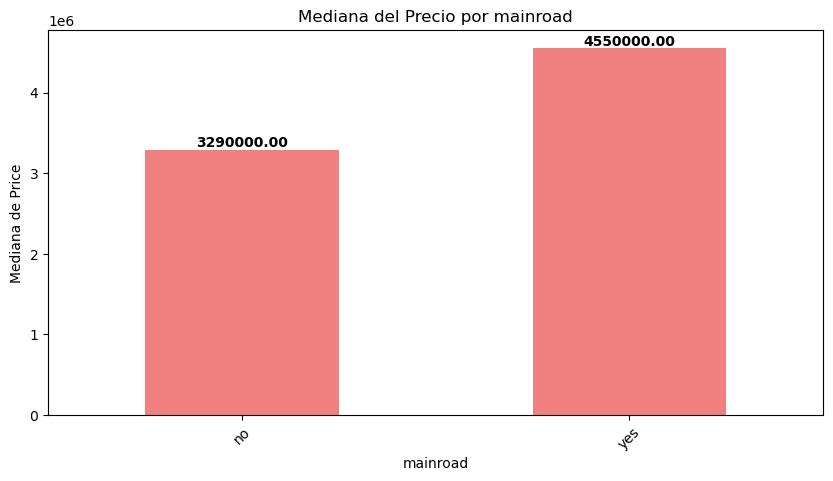

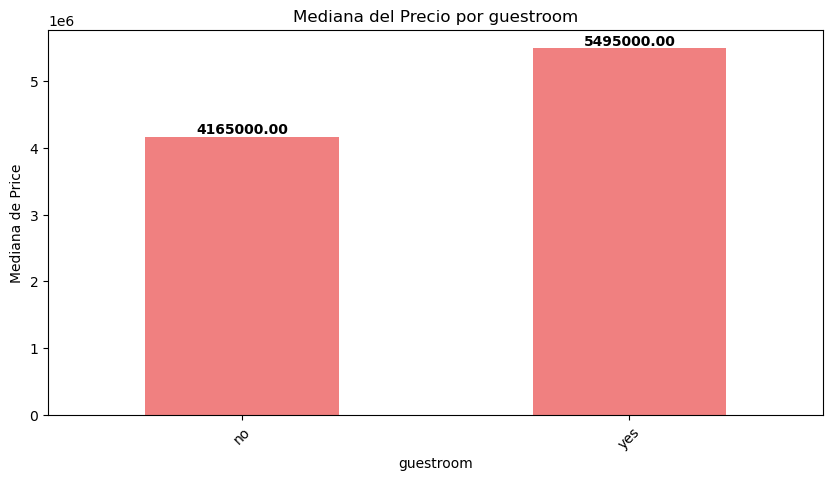

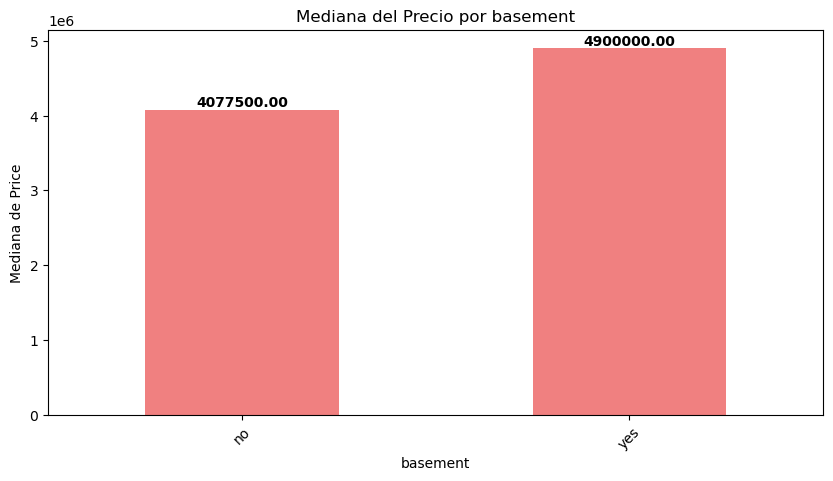

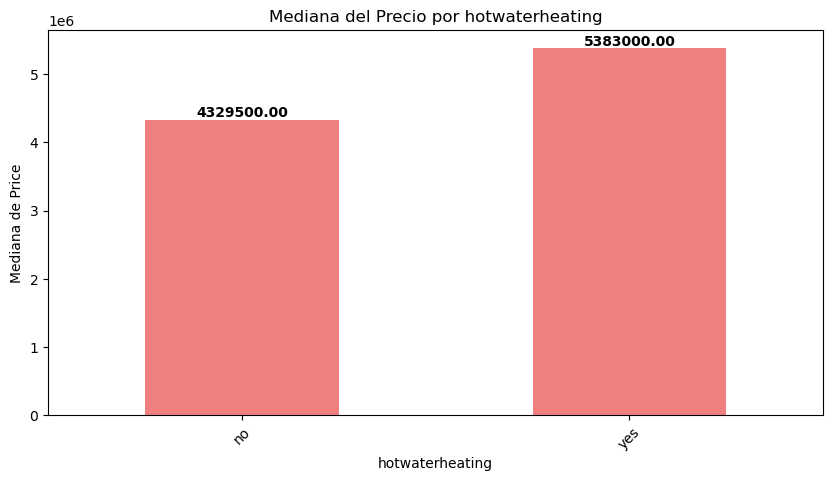

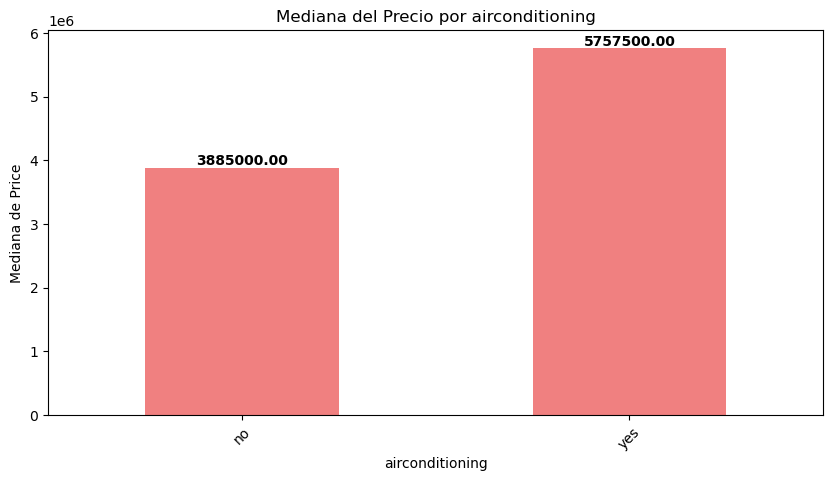

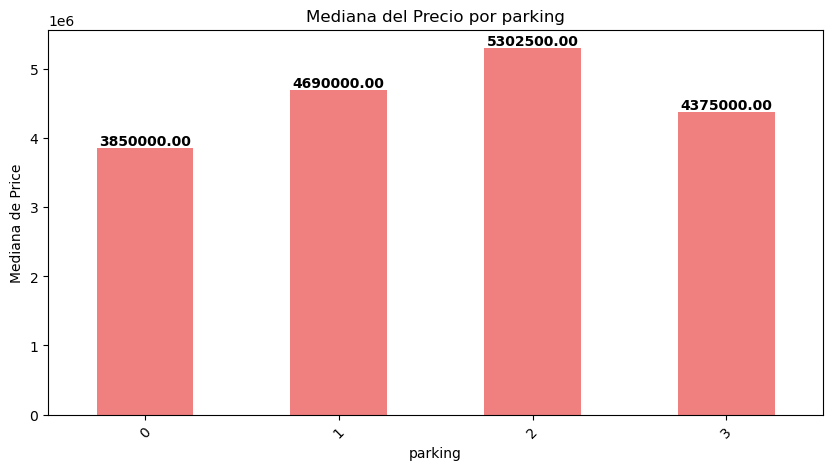

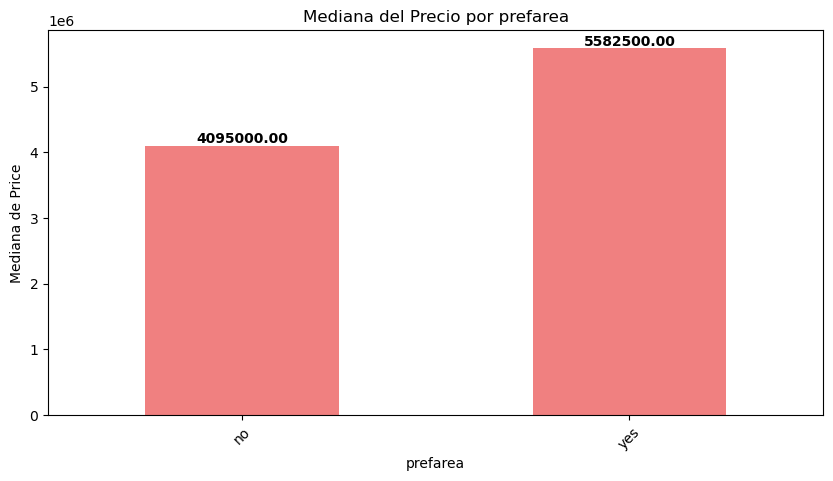

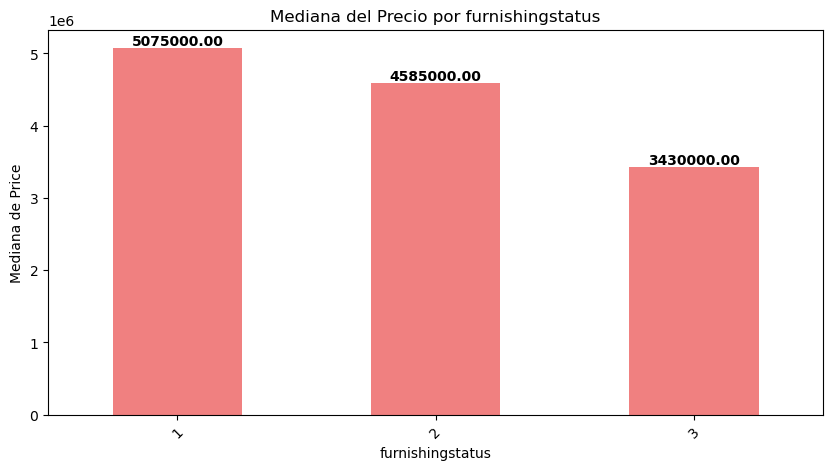

In [144]:
mediana_precio_columnas(df)

Podemos observar que en las viviendas mas caras (de medida) son las que tienen las siguientes caracteristicas:
- 5 habitaciones
- 4 baños
- 4 pisos
- Vivienda en una calle principal 
- Tiene un cuarto de invitados
- Tiene sotano
- Tiene calentador de agua
- Tiene aire acondicionado
- Tiene 2 plazas de parking 
- La vivienda esta en el area preferida 
- Esta amueblado